In [27]:

%matplotlib inline
import matplotlib.pyplot as plt
from PIL import Image

from __future__ import division
import cv2
import numpy as np
import math
import copy


(-0.5, 2447.5, 3263.5, -0.5)

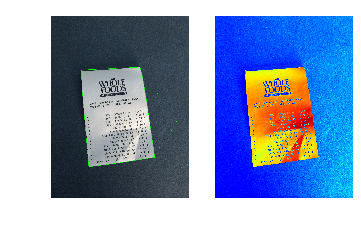

In [28]:
#image = cv2.imread('document-scanner/images/rec2.jpg')
image = cv2.imread('document-scanner/images/receipt.jpg')
image_yuv = cv2.cvtColor(image,cv2.COLOR_BGR2YUV)
image_y = np.zeros(image_yuv.shape[0:2],np.uint8)
image_y[:,:] = image_yuv[:,:,0]

image_blurred = cv2.GaussianBlur(image_y,(3,3),0)

edges = cv2.Canny(image_blurred,100,300,apertureSize = 3)
    
_,contours,hierarchy = cv2.findContours(edges,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)    


simplified_cnts = []
for cnt in contours:    
    hull = cv2.convexHull(cnt)
    simplified_cnt = cv2.approxPolyDP(hull,0.001*cv2.arcLength(hull,True),True)
    simplified_cnts.append(simplified_cnt)

cnt_sel = None
max_size = 0    
for c in simplified_cnts:        
    cs = cv2.arcLength(c, False)
    if (max_size < cs):
        max_size = cs
        cnt_sel = c
    
    
#print (cnt_sel)    
#(H,mask) = cv2.findHomography(cnt_sel.astype('single'),np.array([[[0., 0.]],[[2150., 0.]],[[2150., 2800.]],[[0.,2800.]]],dtype=np.single))
#final_image = cv2.warpPerspective(image,H,(2150, 2800))
    
    
cv2.drawContours(image_y, simplified_cnts ,-1,(0,255,0),1)
cv2.drawContours(image, simplified_cnts ,-1,(0,255,0),5)

    
plt.subplot(1,3,1)
plt.imshow(image)
plt.axis('off')    

plt.subplot(1,3,2)
plt.imshow(image_y)
plt.axis('off')    

#plt.subplot(1,3,3)
#plt.imshow(final_image)
#plt.axis('off')    





In [29]:
im = Image.fromarray(image)
im.save("document-scanner/images/ocr-rec-detect-2.jpeg")